# **<ins>*Increased Heavy Nhaptha Flow Rate from Fractionator Column*</ins>**

## Introduction

The FCC (Fluidized Catalytic Cracking) condenser is a critical component in refinery operations. It process sweet Vacuum Gas Oil as a feed and cracks heavy oil into lighter oils like LPG and Gasoline.

Any malfunctioning of Control valves may lead to distrbance in plant operating parameters. This project applies Machine Learning (ML) techniques to detect anomalies in FCC condenser efficiency.

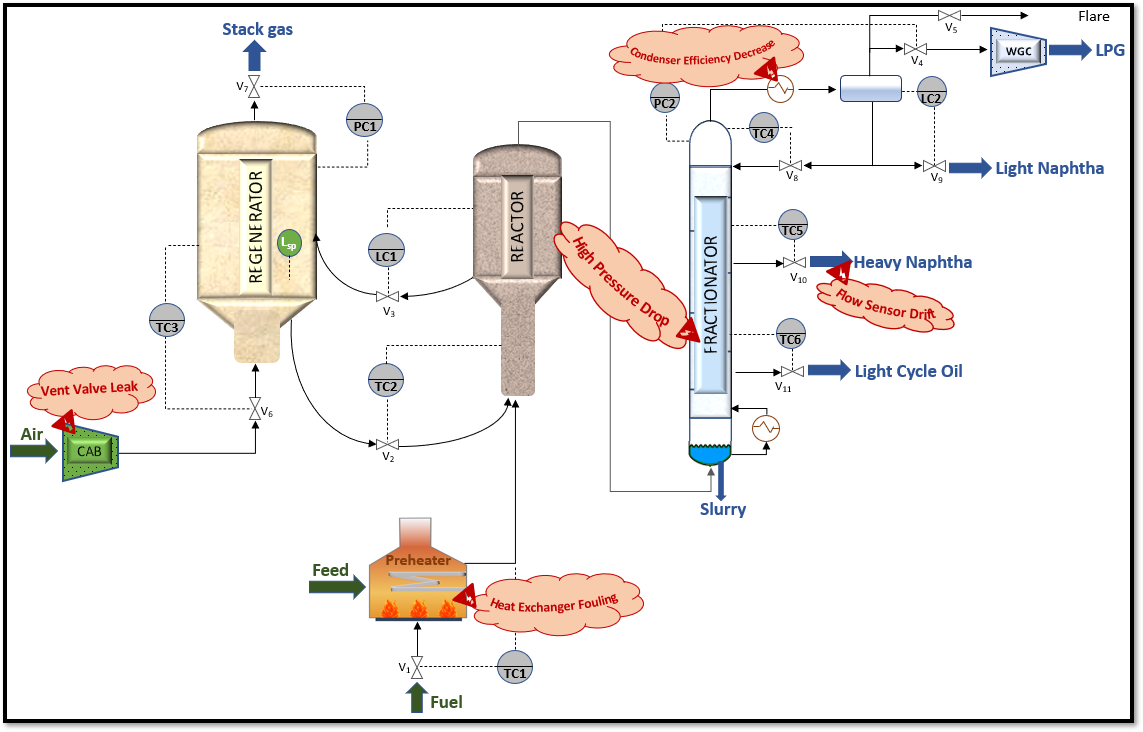

## Data Preprocessing

The dataset contains operational parameters, including temperature, pressure, flow rates, and velocities. The following preprocessing steps were performed:

1. Handling Missing Values: Missing values were filled using mean imputation.
2. Feature Scaling: Standardized using StandardScaler.

## Exploratory Data Analysis (EDA)

EDA was conducted to visualize trends and detect potential anomalies. Key findings:

1. Line plot revealed variations in parameters like Temperature, Pressure, Flowrate, etc.
2. PCA highlighted underlying structure in the dataset.

## Anomaly Detection Techniques

**1. Principal Component Analysis (PCA)**

PCA reduced high-dimensional data to two principal components.<br>
Anomalies were detected by analyzing data points far from the normal cluster.

**2. Autoencoder (Deep Learning)**

A neural network trained to reconstruct normal data patterns.<br>
Reconstruction error was used to flag high-error data points as anomalies.

## **Data Cleaning, Feature Engineering, Predictive Modeling**

Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
1480  164.80  75.521  461.23  34.4    -6.4  28  2.6774  1560.8  616.00   
1244  165.10  77.351  459.94  34.4    -6.4  28  2.6838  1570.5  616.00   
1133  164.84  78.371  460.85  34.4    -6.4  28  2.6804  1563.4  616.01   
733   165.28  80.011  460.53  34.4    -6.4  28  2.6858  1568.1  616.01   
1296  164.85  76.831  460.67  34.4    -6.4  28  2.6819  1564.6  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
1480  968.99  ...  1643.4   218.64   2940.9  310.98  509.68  628.04  50.669   
1244  969.03  ...  1647.1   211.21   2996.0  313.10  510.05  628.41  48.149   
1133  969.04  ...  1642.4   214.63   2978.1  313.47  509.78  628.09  47.583   
733   969.02  ...  1649.7   206.82   3024.8  315.23  510.06  628.32  45.464   
1296  969.06  ...  1645.8   214.10   2986.2  312.63  510.01  628.38  48.742   

          V8     V10     V11  
1480  49.404  49.830  47.218  
1244  49.958  49.234  47.400  
1133  49.593  49.261  47.153  
733   50.073  49.117  47.545  
1296  49.875  49.056  47.327  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
8754  166.17  76.453  461.41  34.4    -6.4  28  2.7019  1568.2  616.00   
9541  164.76  79.656  460.69  34.4    -6.4  28  2.6770  1563.9  616.00   
8351  167.63  78.186  460.40  34.4    -6.4  28  2.7234  1583.5  616.00   
1663  167.38  77.671  460.72  34.4    -6.4  28  2.7183  1579.9  616.00   
9288  165.10  79.945  461.20  34.4    -6.4  28  2.6815  1562.8  616.02   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
8754  969.04  ...  1666.9   205.34   3143.5  315.04  511.34  630.11  46.352   
9541  968.99  ...  1645.0   220.22   3000.6  314.76  509.79  628.26  46.093   
8351  969.00  ...  1689.6   208.17   3402.6  320.51  513.07  632.49  40.988   
1663  968.99  ...  1674.3   207.23   3334.8  319.06  512.70  631.96  42.357   
9288  968.97  ...  1650.4   229.87   3098.0  316.78  510.49  629.47  44.194   

          V8     V10     V11  
8754  52.081  49.984  48.415  
9541  49.747  50.390  47.296  
8351  55.387  52.210  49.563  
1663  54.535  50.895  48.706  
9288  51.018  51.753  47.537  

[5 rows x 46 columns]

In [5]:
df_sensorDrift = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/Fhn_sensorDrift_outputs.csv',header=None)
df_sensorDrift.set_index = df_sensorDrift.iloc[:,0]
df_sensorDrift = df_sensorDrift.drop(columns=0)
df_sensorDrift.columns= col
df_sensorDrift.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
1326  164.93  76.445  460.96  34.4    -6.4  28  2.6806  1563.3  616.00   
214   165.06  77.575  460.70  34.4    -6.4  28  2.6839  1565.7  616.00   
644   164.66  79.991  460.84  34.4    -6.4  28  2.6751  1562.3  615.99   
239   165.18  77.788  460.64  34.4    -6.4  28  2.6829  1566.7  616.00   
302   165.05  78.379  460.70  34.4    -6.4  28  2.6806  1565.6  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
1326  969.02  ...  1643.8   216.84   2967.1  312.09  509.83  628.26  49.408   
214   969.04  ...  1647.0   208.72   2977.8  312.84  509.89  628.09  48.269   
644   968.99  ...  1644.1   218.94   2983.7  314.63  509.62  627.97  46.108   
239   969.00  ...  1648.2   209.58   2987.5  313.18  509.93  628.21  47.917   
302   968.98  ...  1648.1   215.07   3006.0  313.93  509.99  628.45  47.075   

          V8     V10     V11  
1326  49.647  49.574  47.229  
214   49.702  48.879  47.412  
644   49.490  50.249  47.263  
239   49.804  49.294  47.475  
302   49.982  50.068  47.460  

[5 rows x 46 columns]

EDA

In [6]:
df_sensorDrift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_sensorDrift.describe().T

count          mean           std           min           25%  \
F3           1440.0    165.012694  1.582447e-01    164.530000    164.890000   
Tatm         1440.0     78.342193  1.491834e+00     74.981000     77.191500   
T1           1440.0    460.899750  3.939347e-01    459.580000    460.650000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400000  1.732550e-13     -6.400000     -6.400000   
P6           1440.0     28.000000  0.000000e+00     28.000000     28.000000   
Fair         1440.0      2.680681  2.799086e-03      2.672600      2.678675   
T3           1440.0   1564.149444  2.865294e+00   1555.800000   1562.200000   
T2           1440.0    616.000063  7.019004e-03    615.980000    616.000000   
Tr           1440.0    969.000271  2.893517e-02    968.900000    968.980000   
Treg         1440.0   1249.999306  4.729886e-02   1249.900000   1250.000000   
Lsp          1440.0     29.696215  9.494108e-02     29.463000     29.627000   
Tcyc         1440.0   1255.282708  4.426402e-02   1255.200000   1255.300000   
Tcyc - Treg  1440.0      5.283424  3.261765e-02      5.197400      5.258700   
Cco,sg       1440.0  29878.145139  4.297248e+01  29772.000000  29848.000000   
Co2,sg       1440.0      0.012496  1.463217e-04      0.012105      0.012383   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     46.263644  3.639285e-01     45.379000     46.008750   
V6           1440.0     24.800864  8.697047e-02     24.530000     24.747000   
V7           1440.0     54.594028  5.706766e-02     54.429000     54.553000   
V3           1440.0     46.989394  1.545578e-02     46.949000     46.978000   
V1           1440.0     57.939251  2.065033e-01     57.343000     57.801000   
V2           1440.0     45.296442  5.164279e-02     45.163000     45.259000   
Frgc         1440.0  49586.847222  5.545769e+01  49425.000000  49546.000000   
Fsc          1440.0  49586.981944  5.556882e+01  49425.000000  49547.000000   
ACAB         1440.0    280.759167  1.341559e+00    277.200000    279.750000   
AWGC         1440.0    204.625167  2.503420e+00    198.600000    202.837500   
F5           1440.0   1990.668125  7.094397e+00   1970.200000   1985.900000   
F7           1440.0   3737.161944  4.866664e+00   3723.800000   3733.700000   
Fsg          1440.0    160.840868  1.682502e-01    160.350000    160.720000   
FV11         1440.0  28116.102778  2.741912e+02  27445.000000  27925.750000   
P1           1440.0     14.638000  7.640988e-14     14.638000     14.638000   
P2           1440.0     35.041949  2.131480e-02     35.000000     35.028000   
FLPG         1440.0   3037.770347  4.418845e+01   2931.300000   3006.075000   
FLN          1440.0   3917.952569  4.534407e+01   3853.300000   3878.675000   
FHN          1440.0    724.872389  1.138577e+01    702.770000    715.775000   
FLCO         1440.0   1643.657778  3.783916e+00   1632.900000   1640.800000   
FSlurry      1440.0    213.914854  3.732455e+00    205.910000    211.110000   
FReflux      1440.0   2984.431944  1.881372e+01   2938.600000   2972.300000   
Tfra         1440.0    313.547104  1.204784e+00    310.710000    312.657500   
T10          1440.0    509.836000  1.324484e-01    509.500000    509.740000   
T20          1440.0    628.161542  1.593855e-01    627.840000    628.040000   
V9           1440.0     47.511359  1.506424e+00     45.384000     46.213750   
V8           1440.0     49.688406  1.921797e-01     49.287000     49.534000   
V10          1440.0     49.368132  4.821624e-01     47.873000     49.071750   
V11          1440.0     47.220358  2.076930e-01     46.630000     47.065500   

                      50%           75%           max  
F3             165.020000    165.140000    165.480000  
Tatm            78.746000     79.687250     80.070000  
T1             460.910000    461.140000    462.050000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

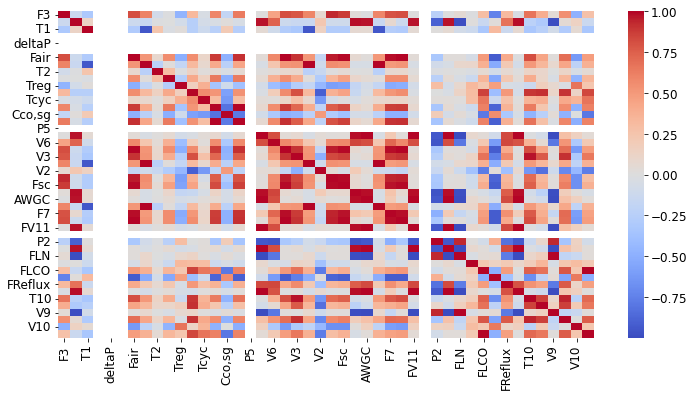

In [8]:
sns.heatmap(df_sensorDrift.corr(),cmap='coolwarm')

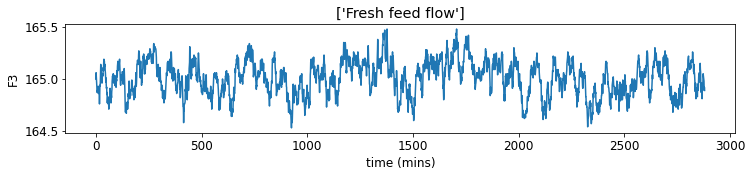

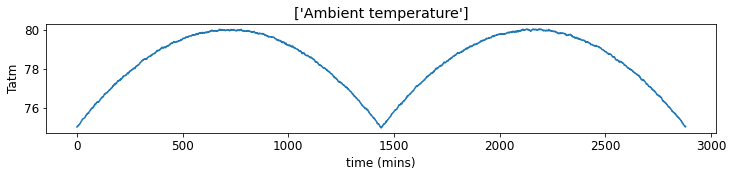

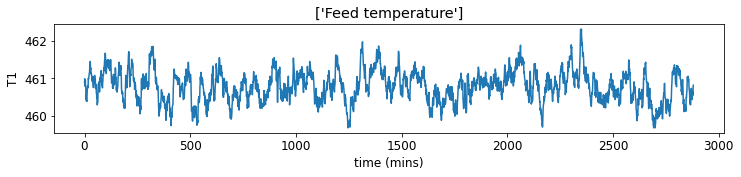

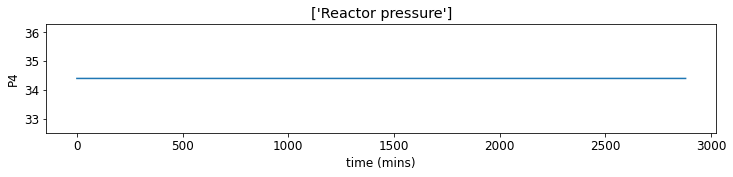

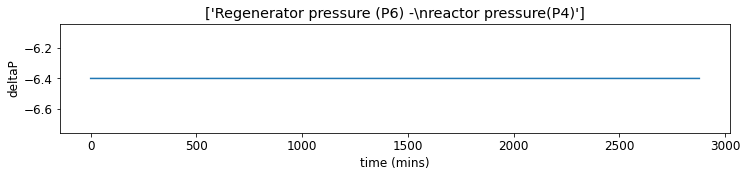

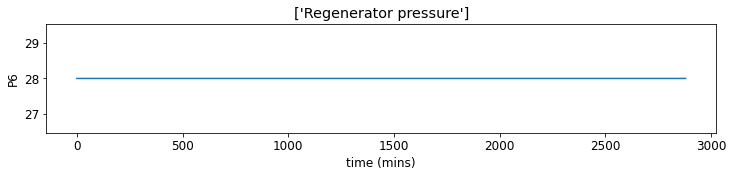

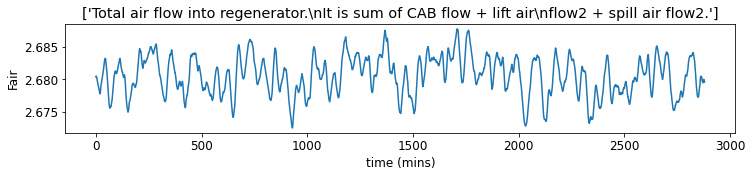

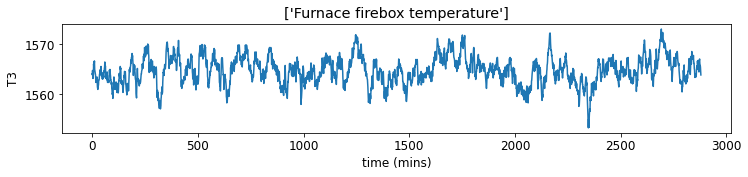

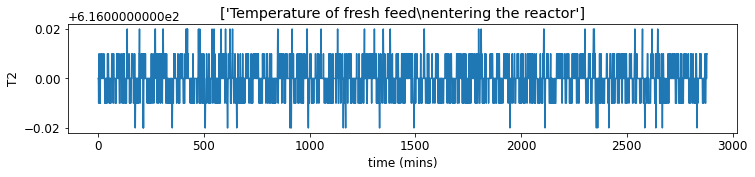

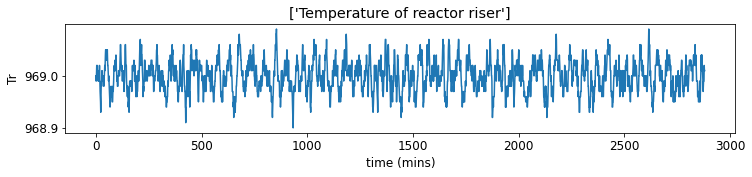

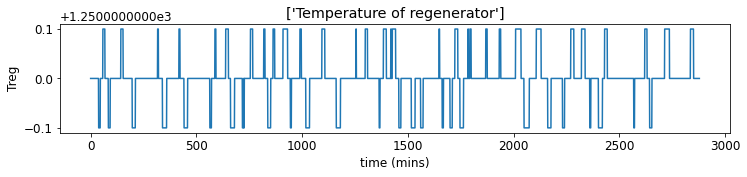

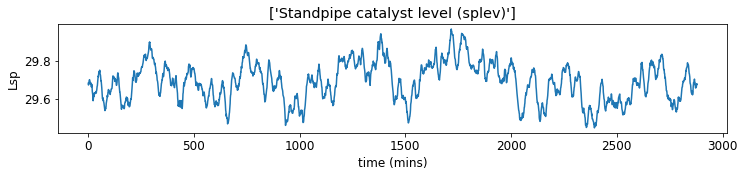

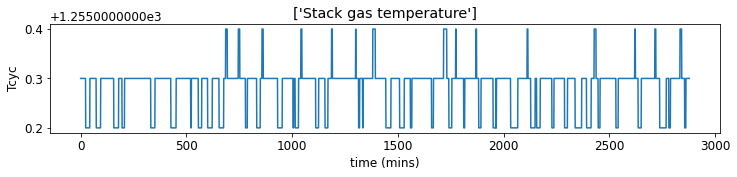

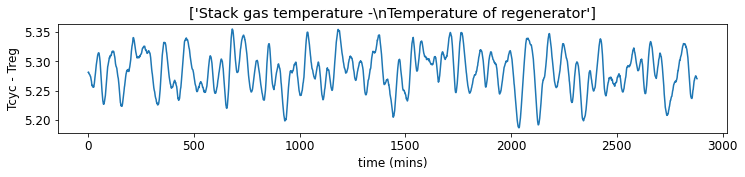

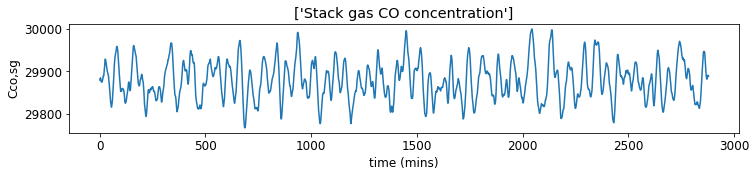

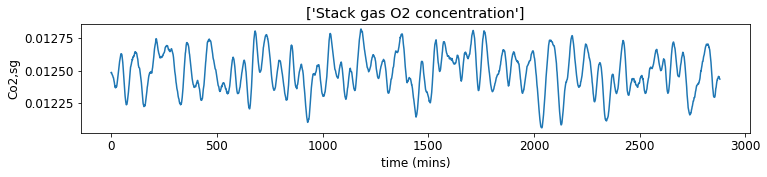

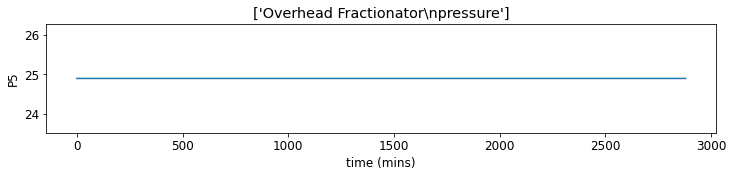

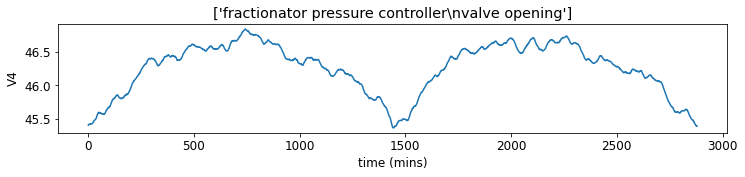

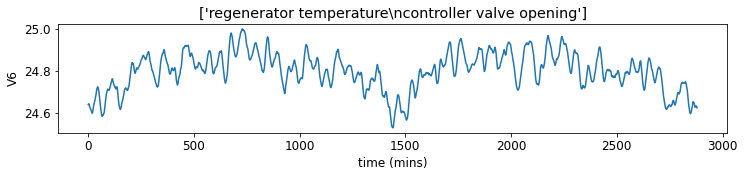

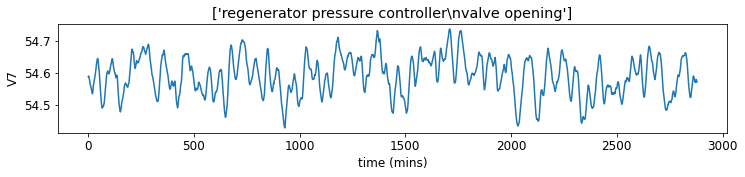

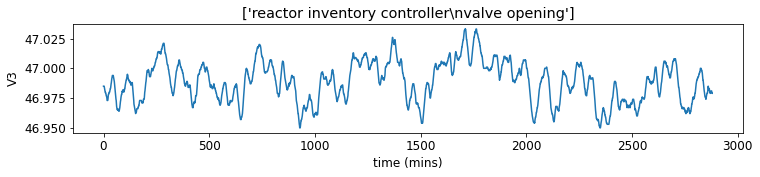

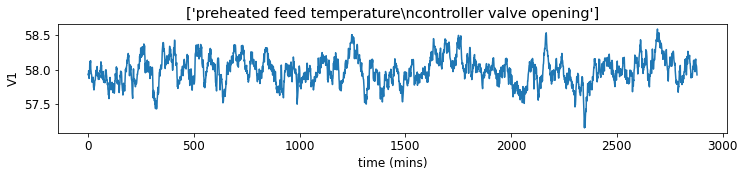

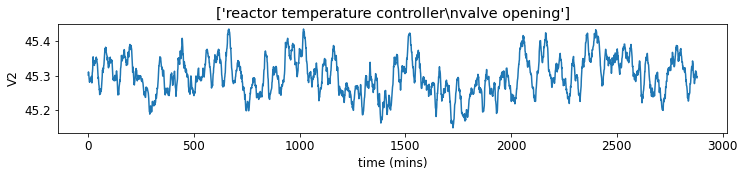

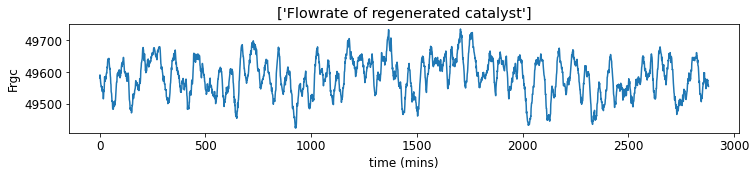

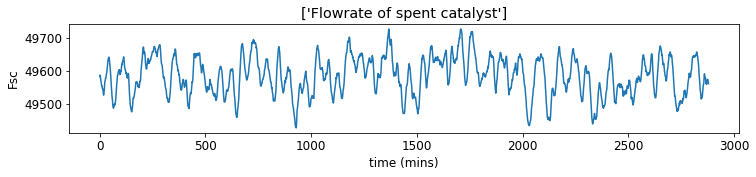

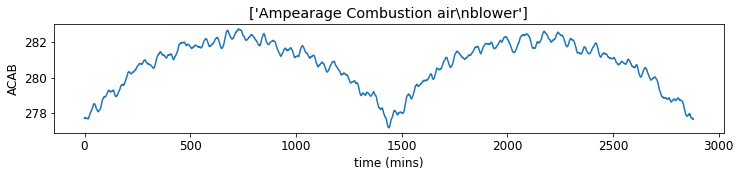

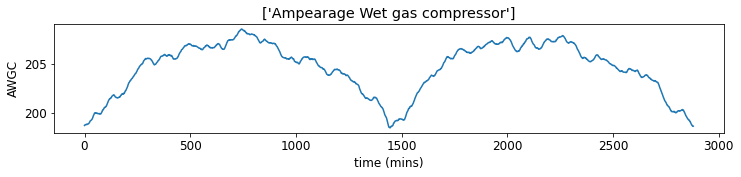

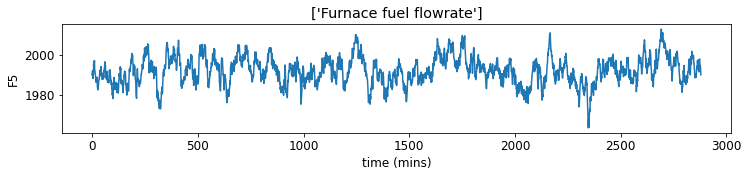

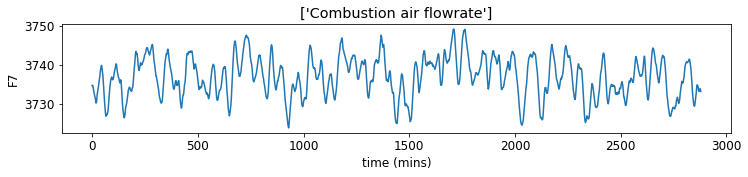

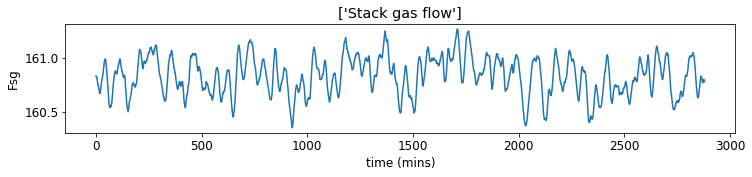

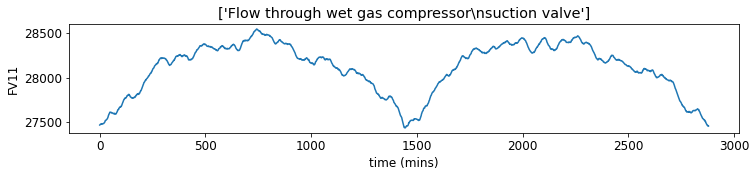

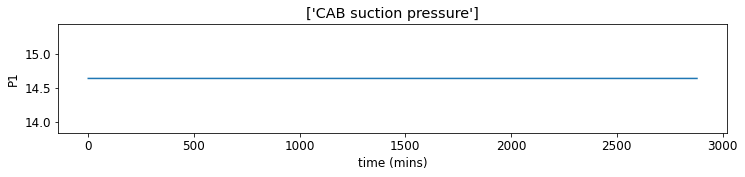

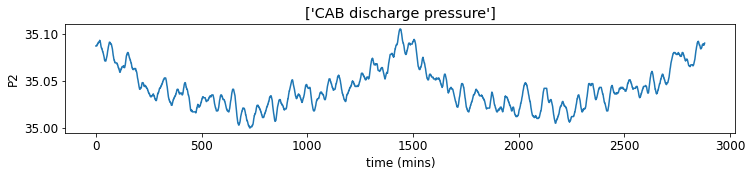

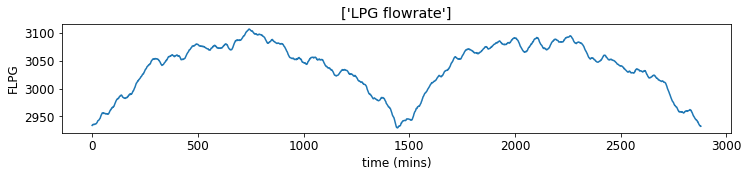

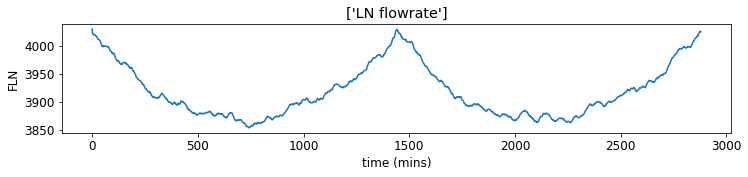

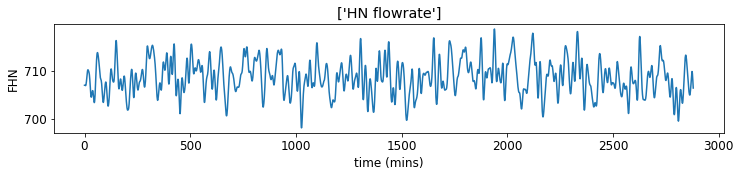

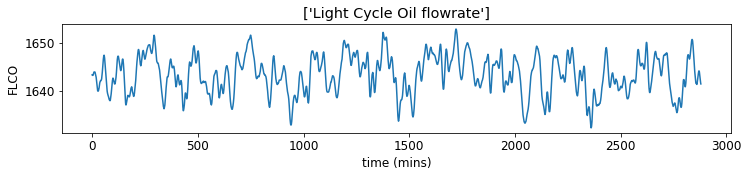

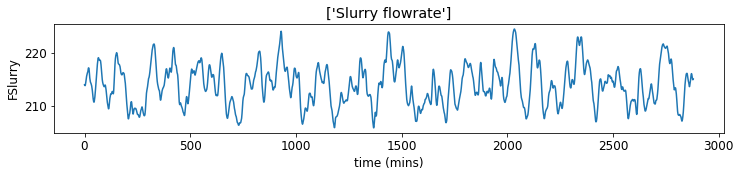

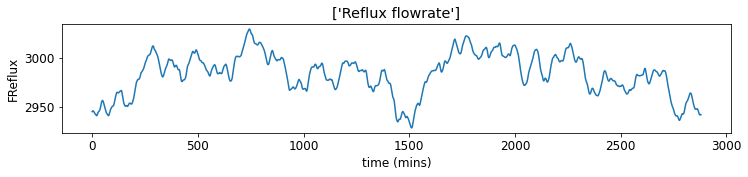

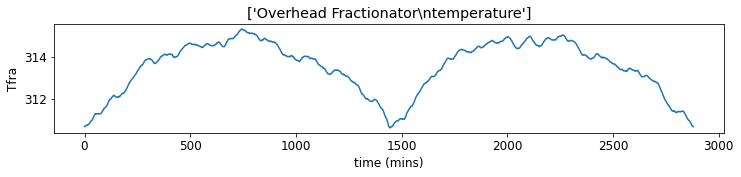

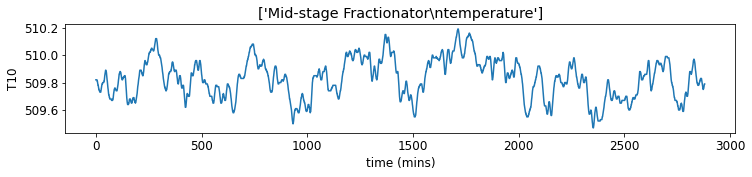

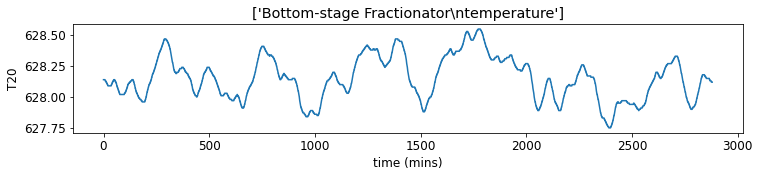

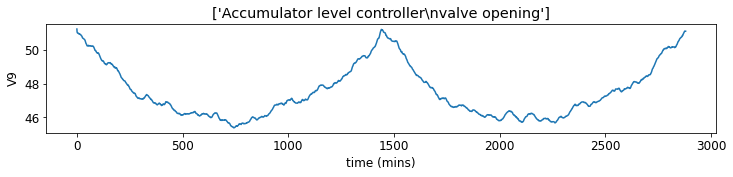

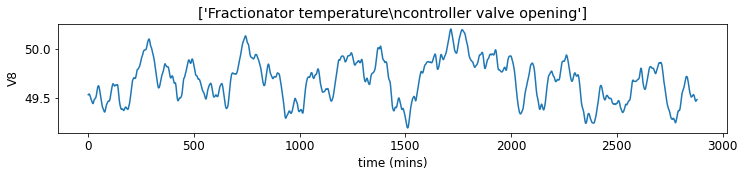

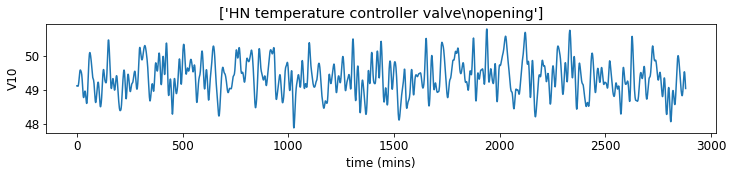

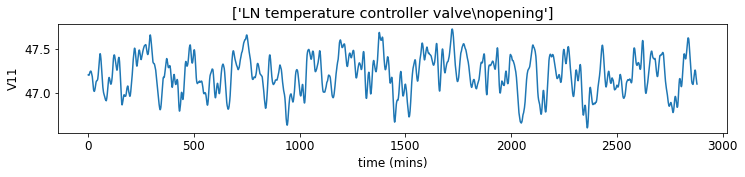

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

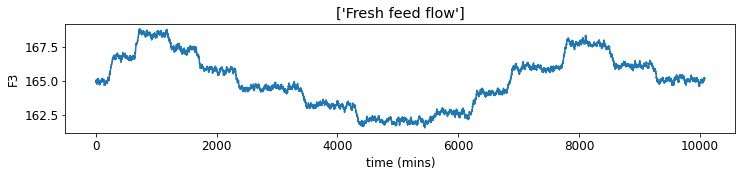

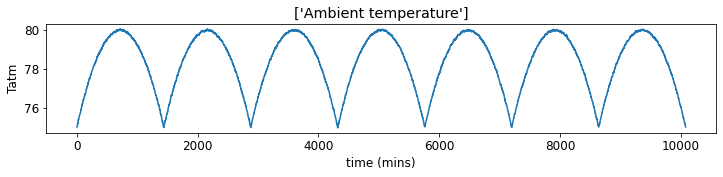

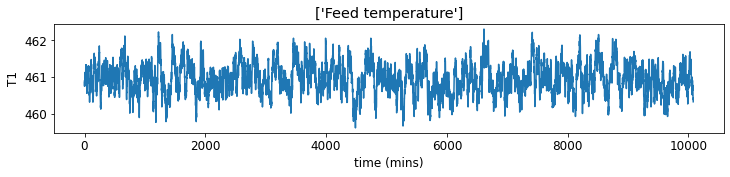

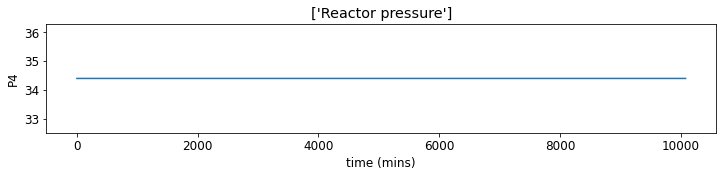

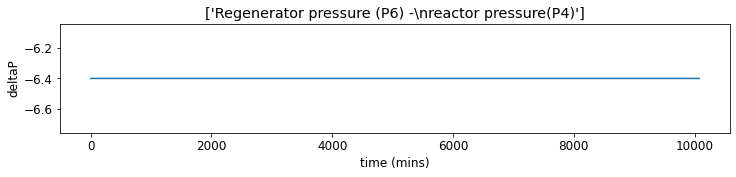

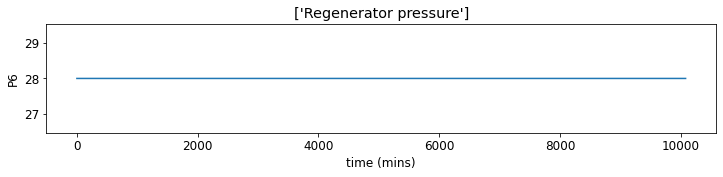

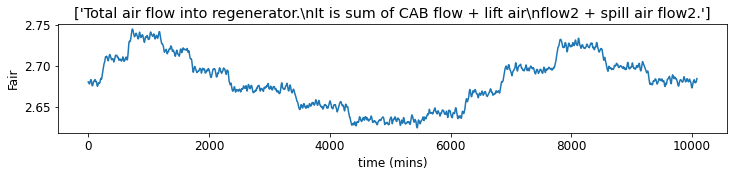

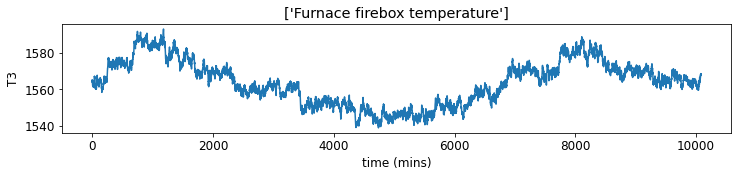

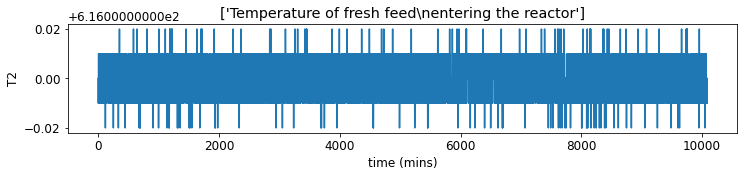

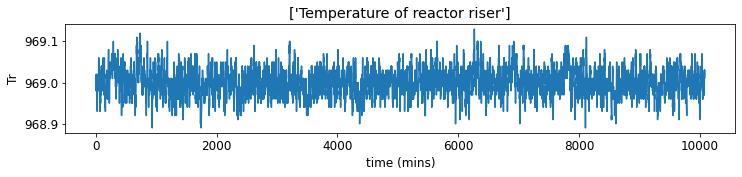

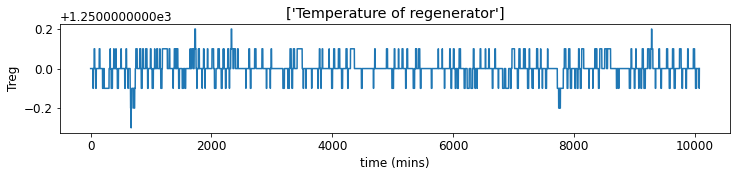

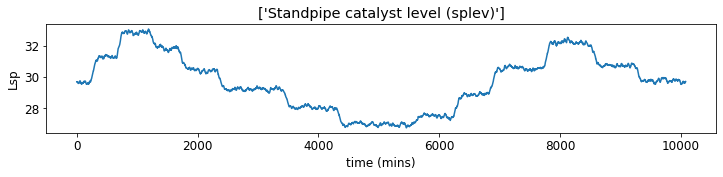

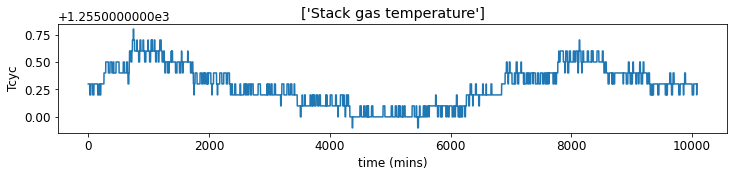

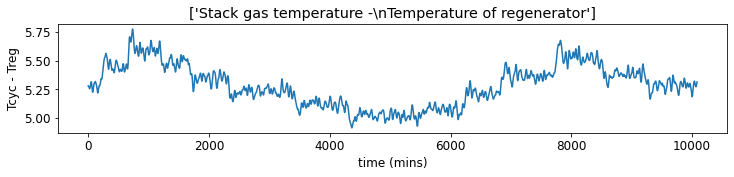

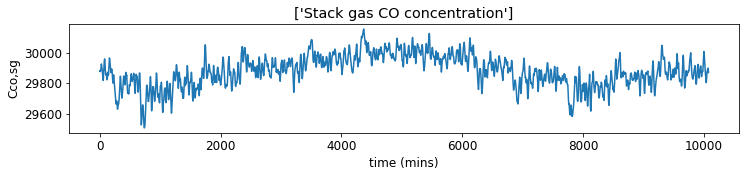

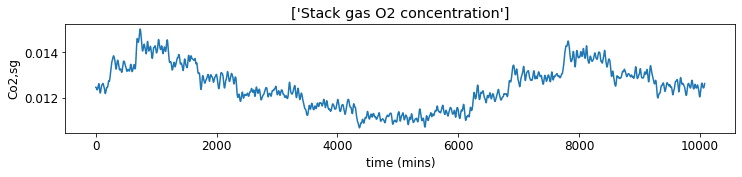

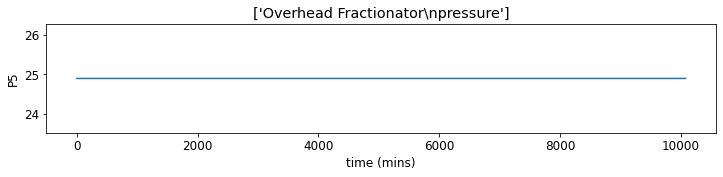

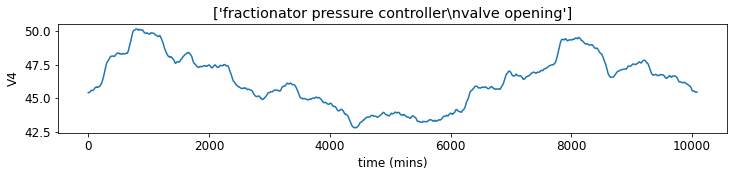

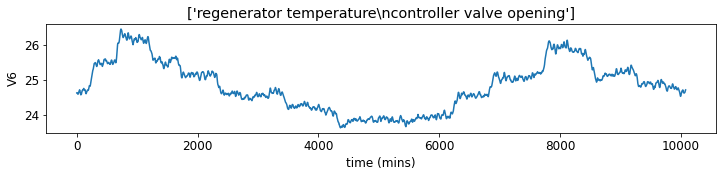

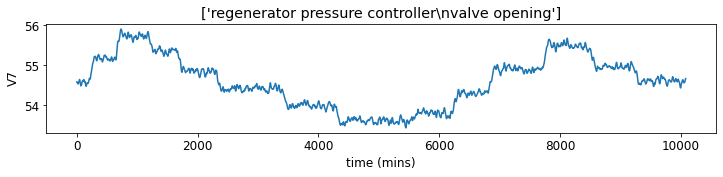

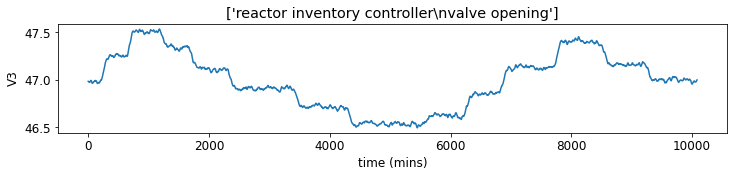

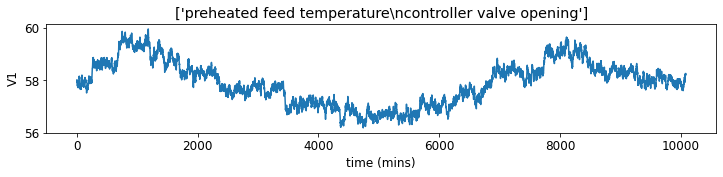

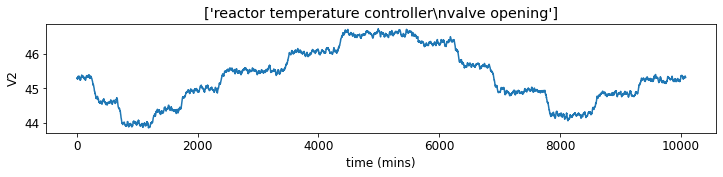

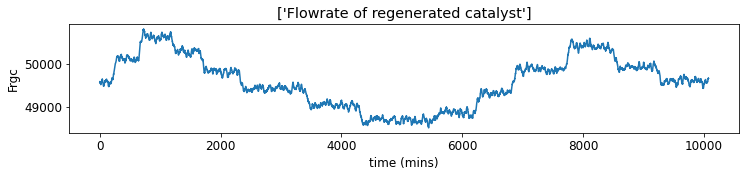

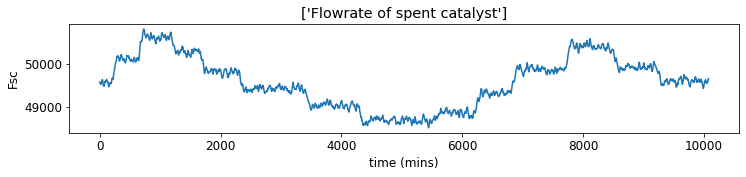

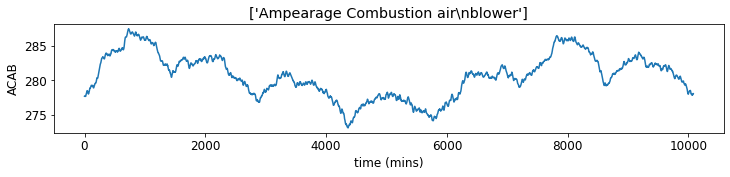

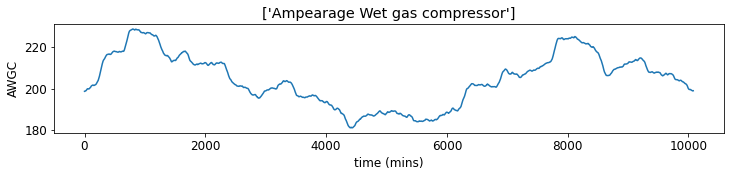

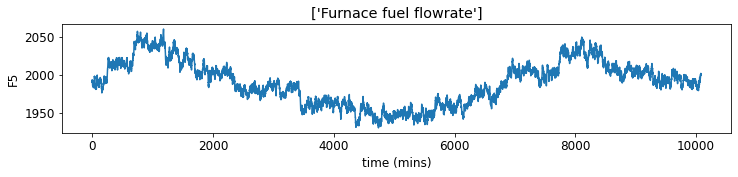

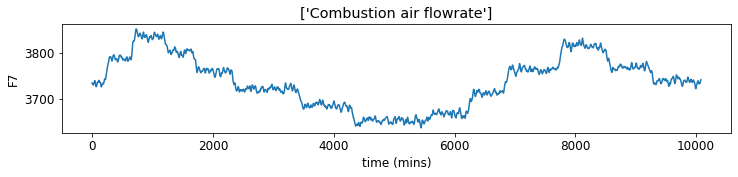

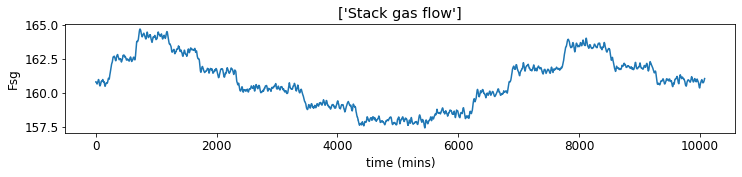

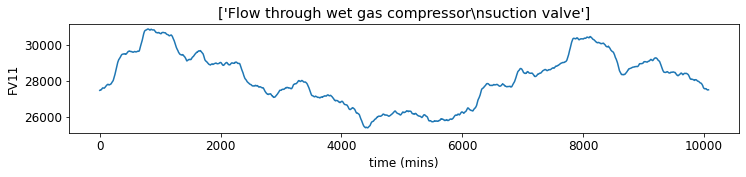

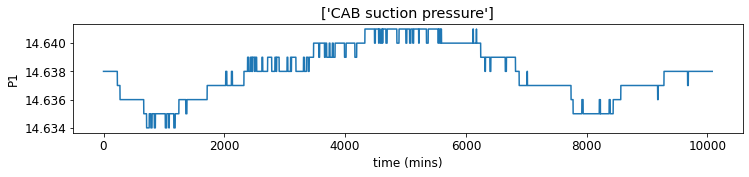

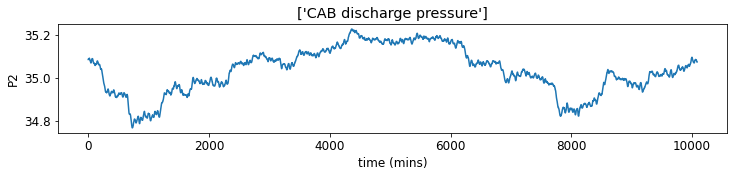

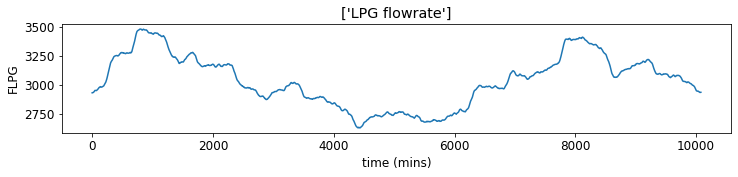

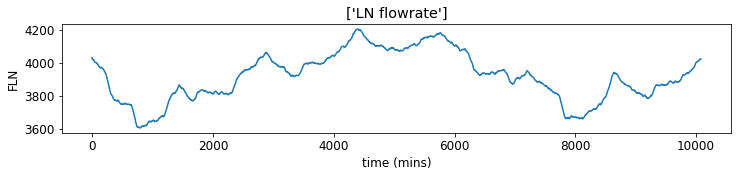

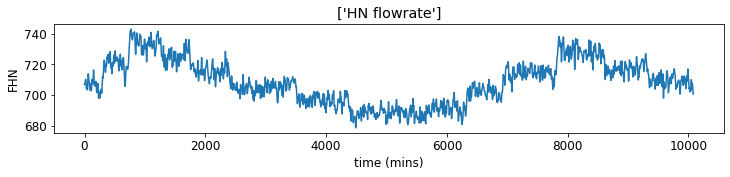

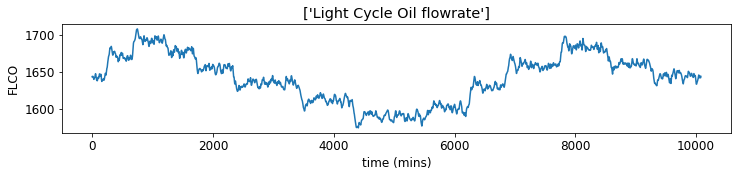

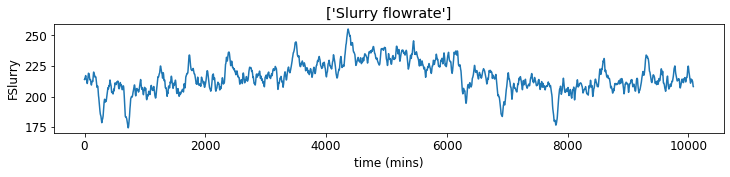

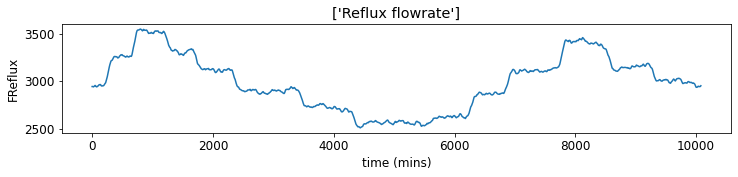

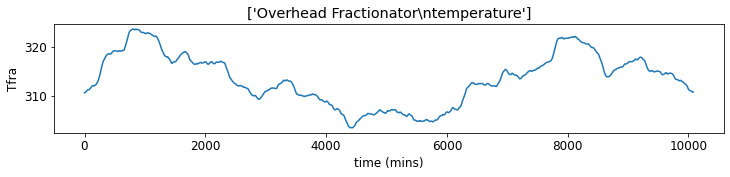

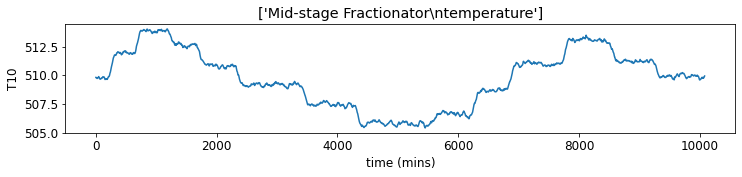

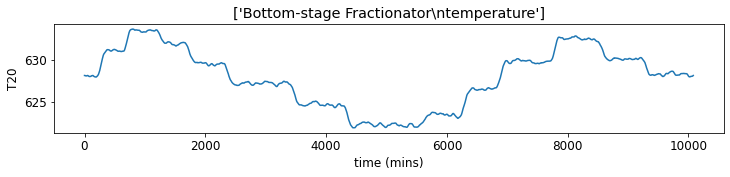

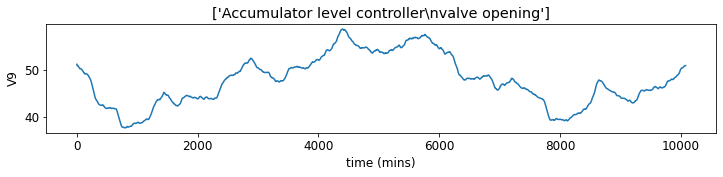

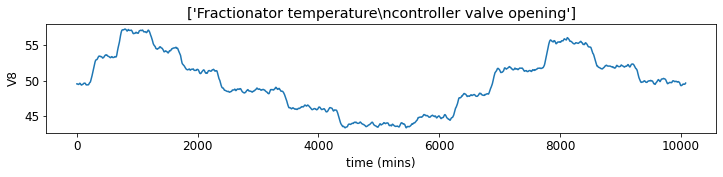

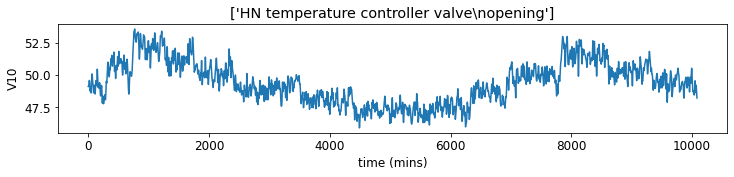

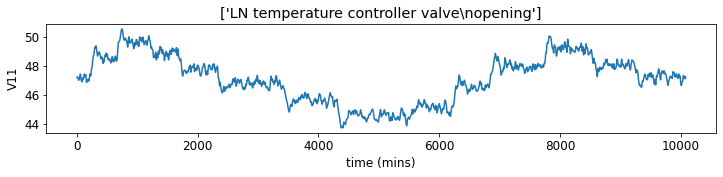

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

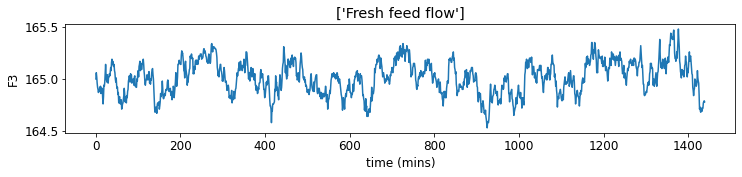

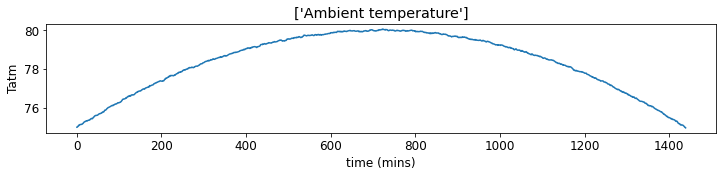

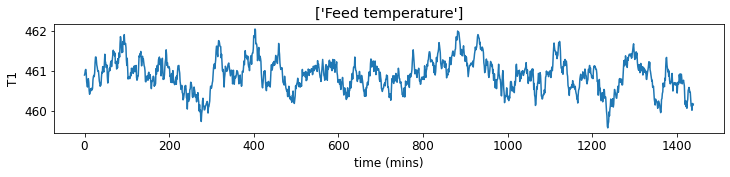

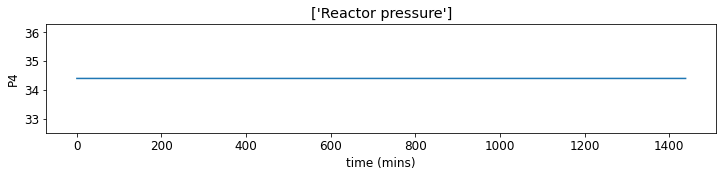

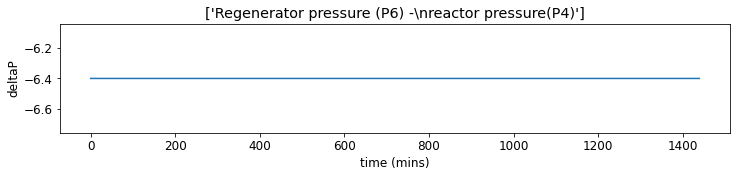

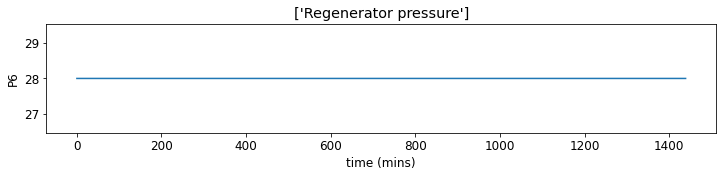

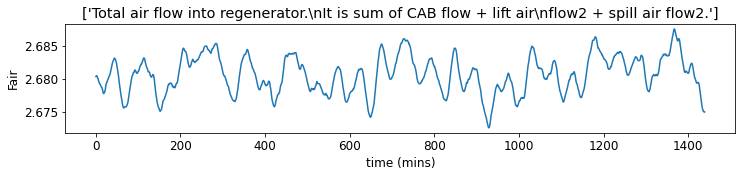

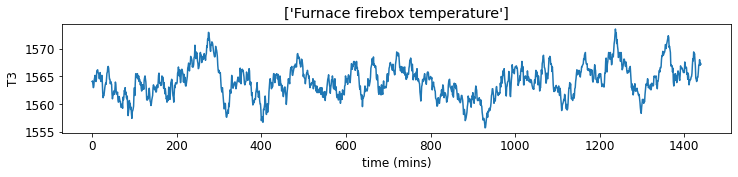

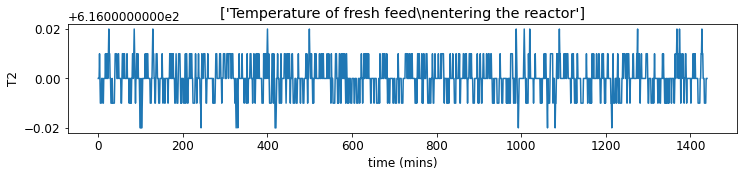

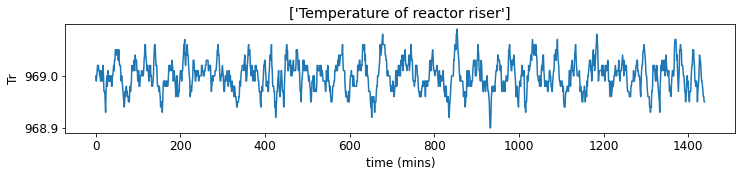

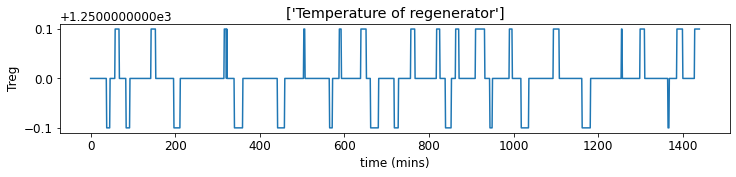

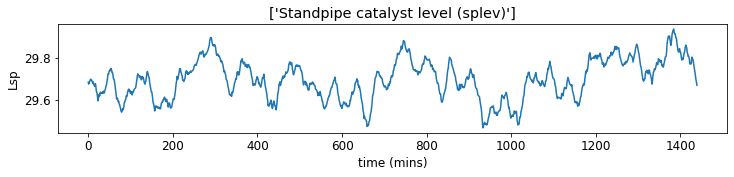

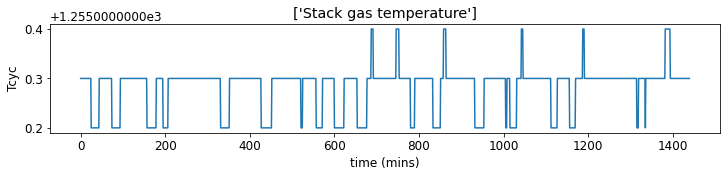

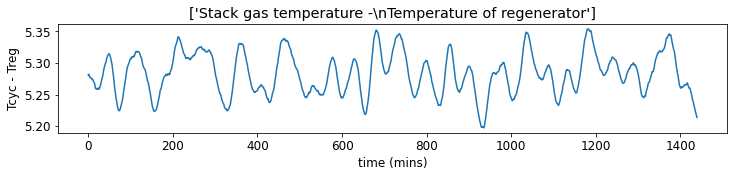

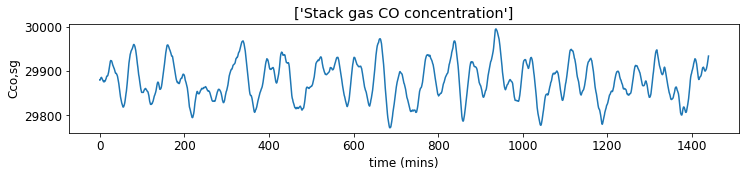

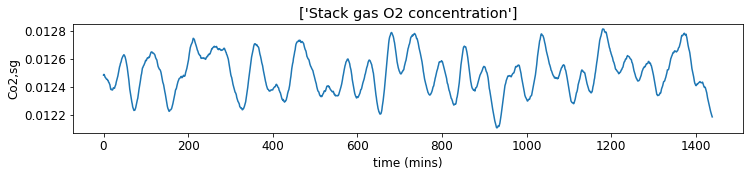

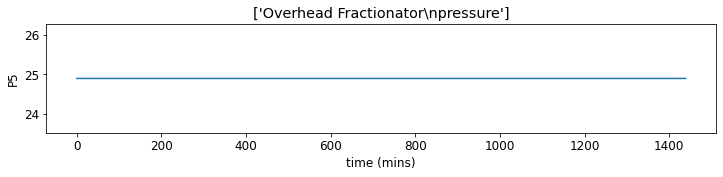

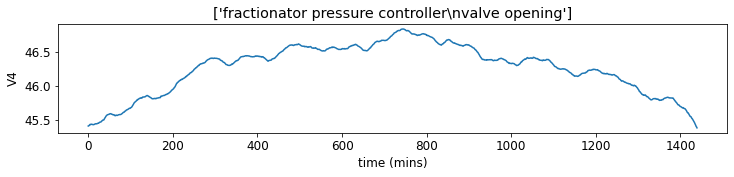

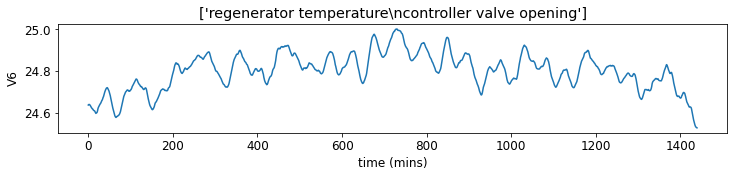

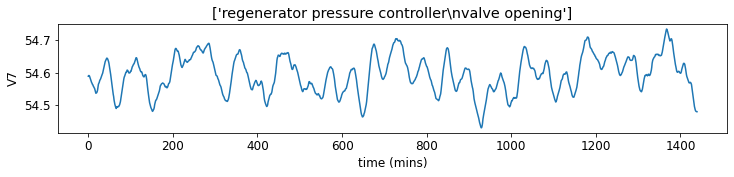

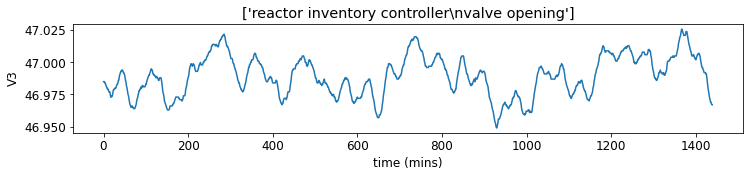

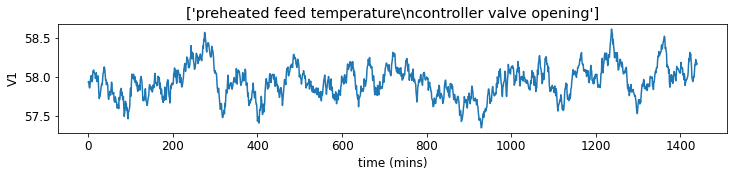

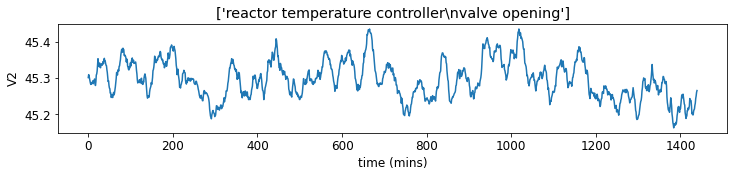

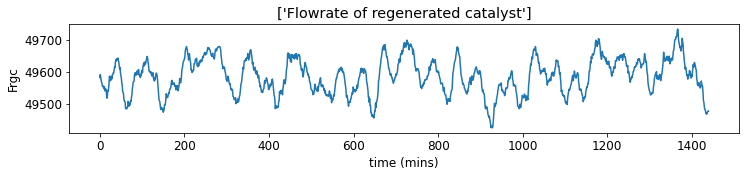

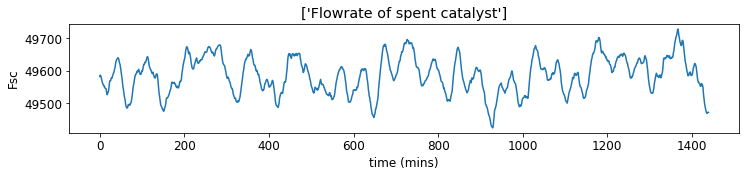

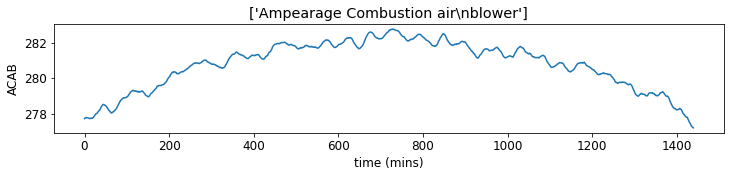

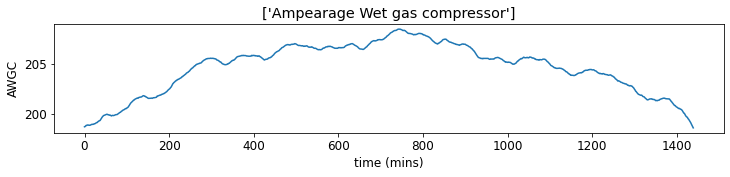

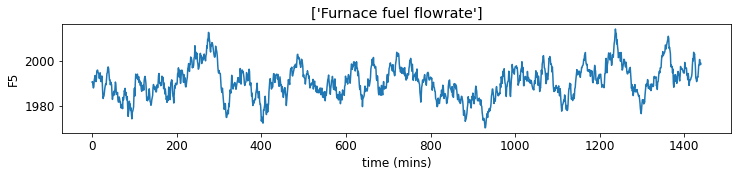

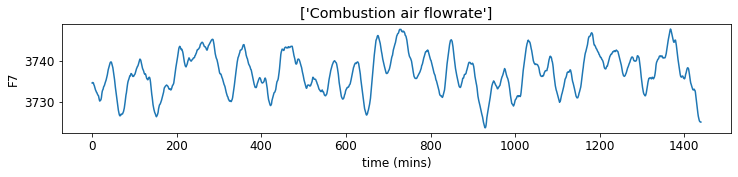

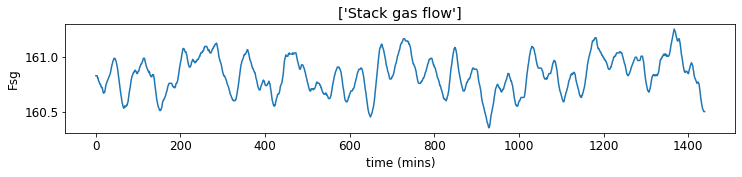

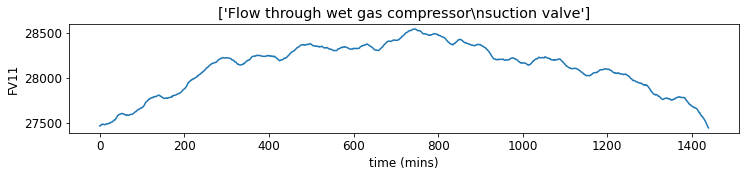

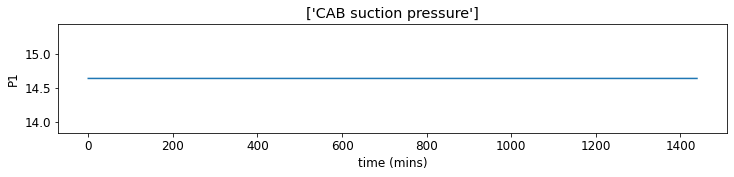

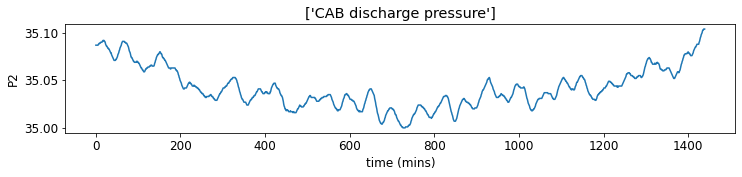

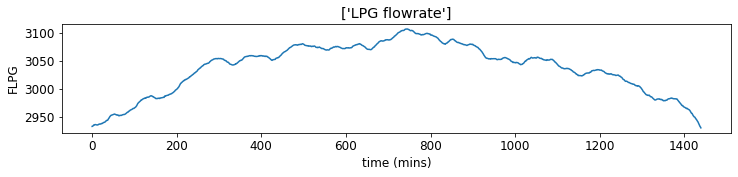

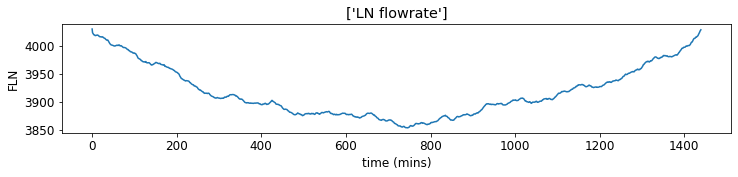

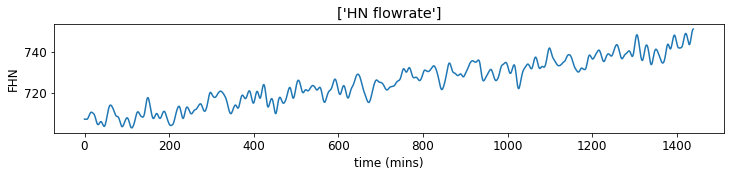

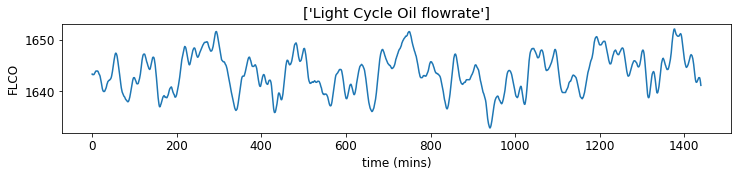

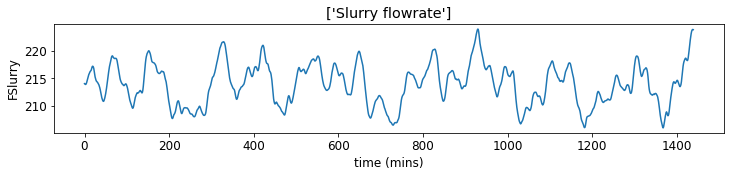

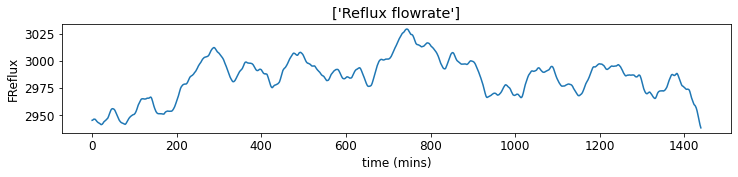

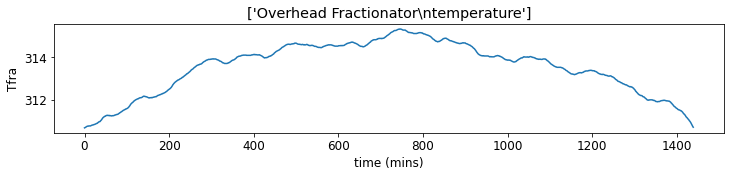

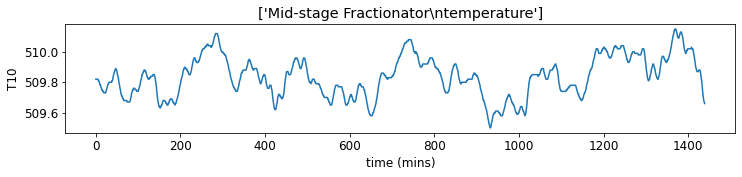

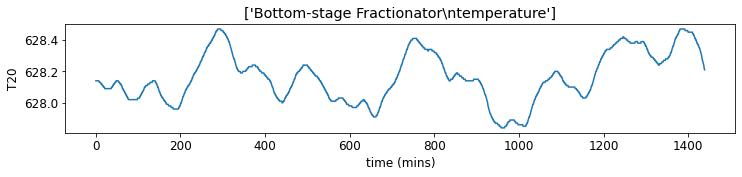

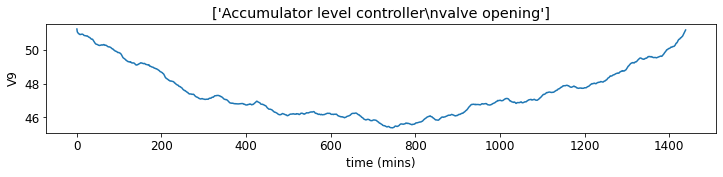

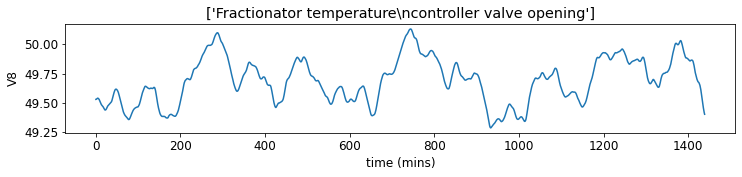

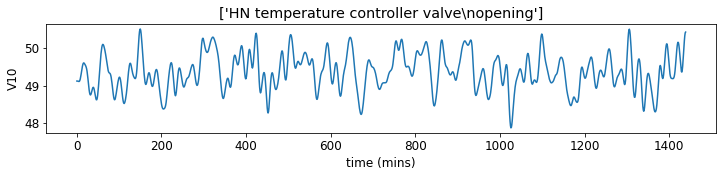

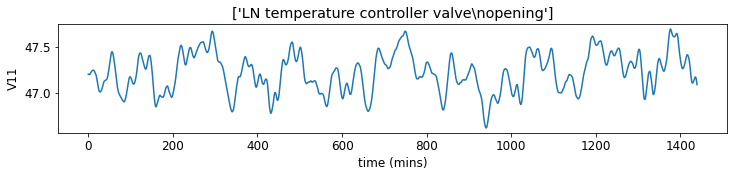

In [11]:
for n,i in enumerate(df_sensorDrift.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_sensorDrift[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

**Scaling the data with mean=0 & std = 1 using Standard Scalar.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)

**Applying PCA**

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X)

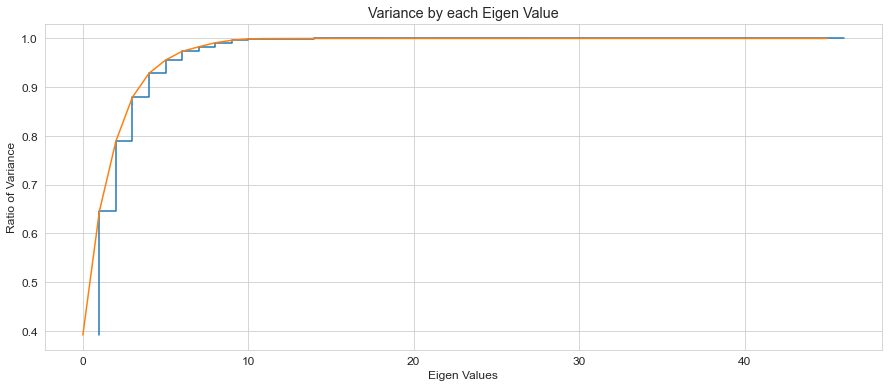

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

It can be clearly seen than 10 dimentions can describe more than 98% data, hence redcing the feature space from 46 to 10.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

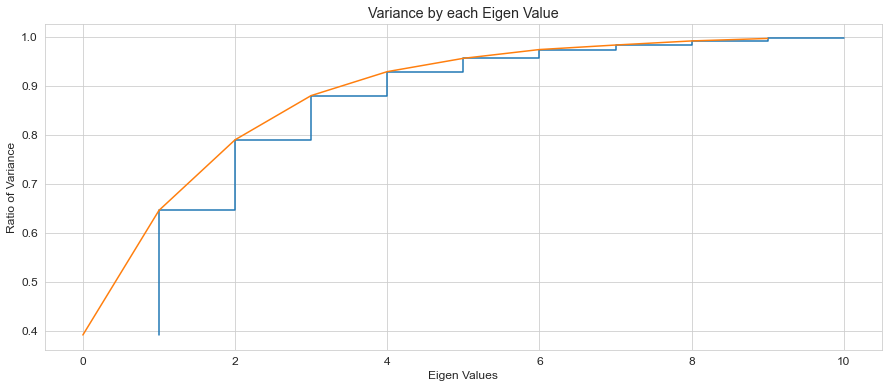

In [18]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

**Applying Autoencoders**

In [19]:
X_train = X.reshape(2880,46,1)

Lets create a Sequential model with Bidirectional LSTM & train the model when plant is in steady state.<br>
To avoid overfitting of model by using 20% dropout.

In [20]:
# del model

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),input_shape=(46,1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 46, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 46, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 46, 256)           0         
                                                                 
 dense (Dense)               (None, 46, 1)             257       
                                                                 
Total params: 1185025 (4.52 MB)
Trainable params: 118502

In [22]:
model.fit(X_train,X_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 27s 252ms/step - loss: 0.1400 - mae: 0.2014
Epoch 2/30
90/90 [==============================] - 23s 261ms/step - loss: 0.0028 - mae: 0.0362
Epoch 3/30
90/90 [==============================] - 24s 265ms/step - loss: 0.0023 - mae: 0.0328
Epoch 4/30
90/90 [==============================] - 24s 263ms/step - loss: 0.0021 - mae: 0.0311
Epoch 5/30
90/90 [==============================] - 23s 254ms/step - loss: 0.0020 - mae: 0.0295
Epoch 6/30
90/90 [==============================] - 23s 256ms/step - loss: 0.0018 - mae: 0.0285
Epoch 7/30
90/90 [==============================] - 24s 271ms/step - loss: 0.0018 - mae: 0.0278
Epoch 8/30
90/90 [==============================] - 24s 267ms/step - loss: 0.0017 - mae: 0.0273
Epoch 9/30
90/90 [==============================] - 25s 276ms/step - loss: 0.0017 - mae: 0.0270
Epoch 10/30
90/90 [==============================] - 23s 260ms/step - loss: 0.0016 - mae: 0.0264
Epoch 11/30
90/90 [====================

**Calculating the Reconstruction error using MAE.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

In [23]:
error_ae = []
for i in range(X.shape[0]):
    y_pred = model.predict(X[i].reshape(1,46,1),verbose=None)[0,:,0]
    error_ae.append(np.abs(X[i]-y_pred).sum())
AE_CL = np.percentile(error_ae,99)

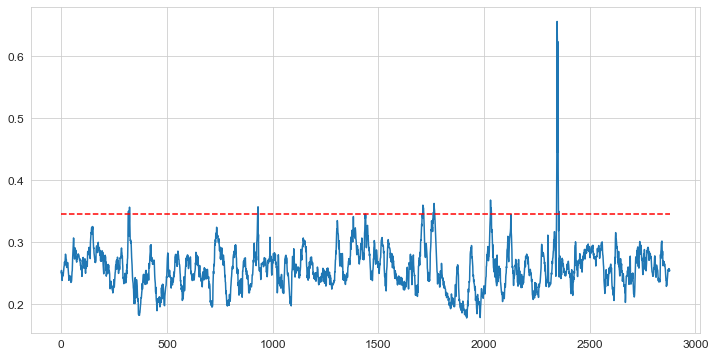

In [24]:
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')

**Calculating the Reconstruction error using Q-test, T22-test & Cosine similarity.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

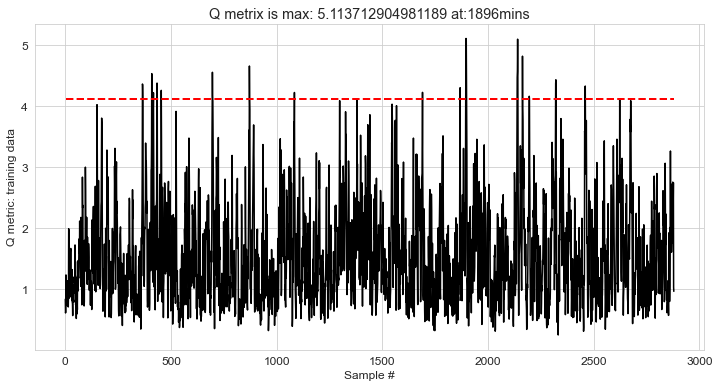

In [25]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

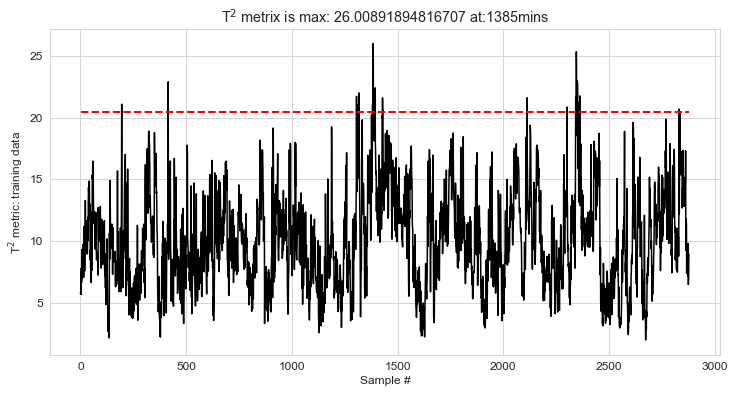

In [26]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

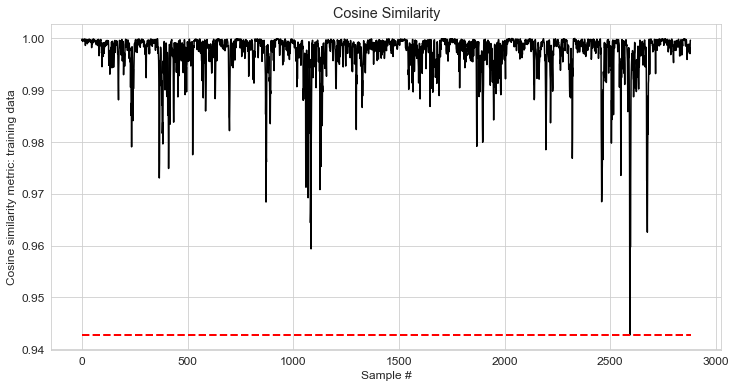

In [27]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.title(f'Cosine Similarity')
plt.show()

In [28]:
Q_CL,T_CL,C_CL,E_CL,AE_CL

(4.1231132155190675,
 20.424350352568798,
 0.9427550112367162,
 0.9281694746755795,
 0.34530417881903325)

Let's create a function for test data preprocessing and testing the data with our model.

In [29]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error_pca = X-X_reconstructed
    Q_train = np.sum(np.abs(error_pca),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error_pca

In [30]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [31]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine Similarity')
    plt.show()

In [32]:
def autoencoder(df_test,CL):
    X_test = ss.transform(df_test)
    error_ae = []
    error_sum = []
    for i in range(X_test.shape[0]):
        y_pred = model.predict(X_test[i].reshape(1,46,1),verbose=None)[0,:,0]
        error_ae.append(np.abs(X_test[i]-y_pred))
        error_sum.append(np.abs(X_test[i]-y_pred).sum())
    error_ae=np.array(error_ae)
    pd.Series(error_sum).plot(color = 'black')
    plt.hlines(CL,0,len(error_ae),colors='red',linestyles='--')
    plt.xlabel('Sample #')
    plt.ylabel('Reconstruction error by Autoencoder')
    return error_ae

## **Testing the model on Varying feed flow rate.**

In [33]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

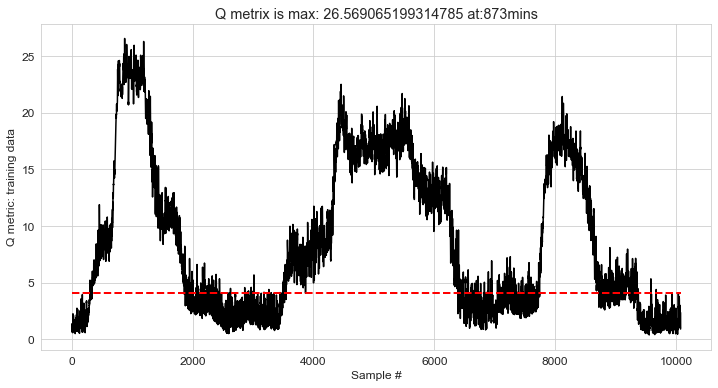

In [34]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

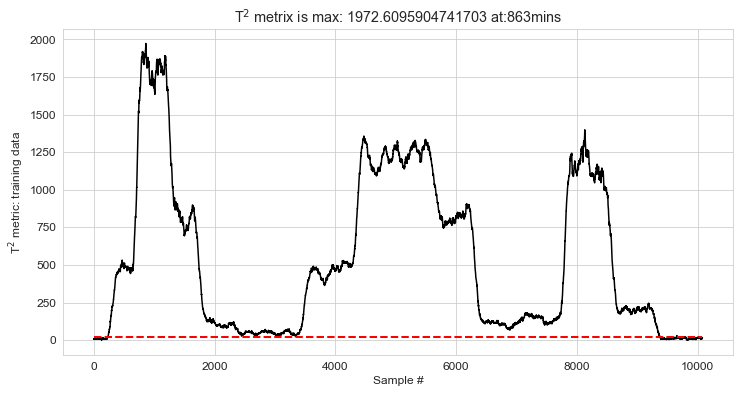

In [35]:
T_test(X_test,pca.explained_variance_,T_CL)

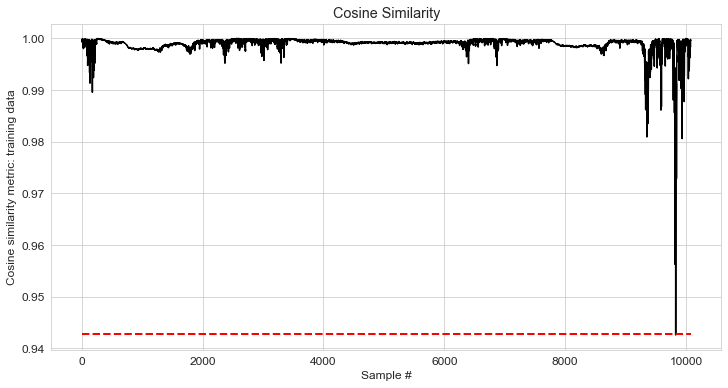

In [36]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

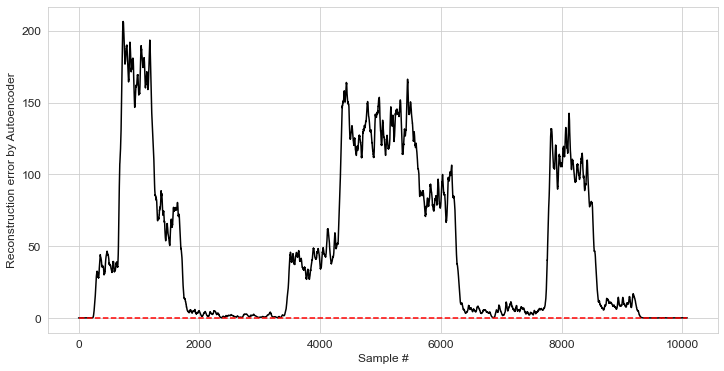

In [37]:
error_ae = autoencoder(df_varyingFeedFlow,AE_CL)

## **Testing the model on abnormal dataset.**

In [38]:
X = ss.transform(df_sensorDrift)
X_test = pca.transform(X)

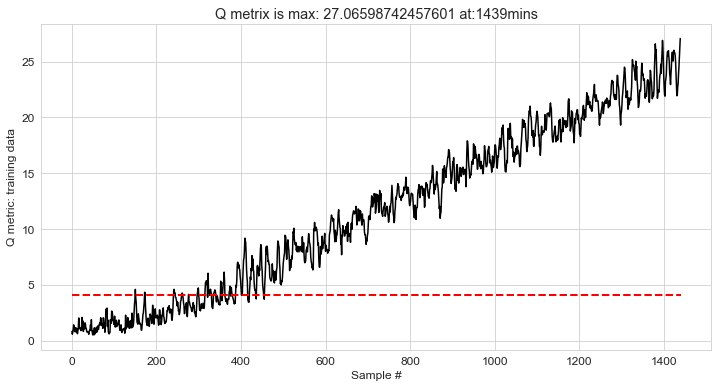

In [39]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

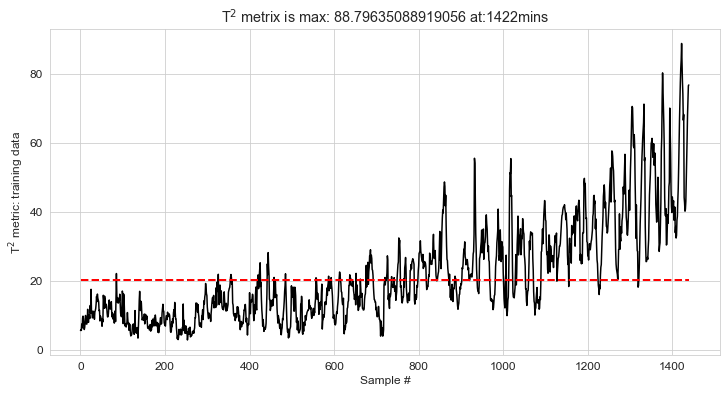

In [40]:
T_test(X_test,pca.explained_variance_,T_CL)

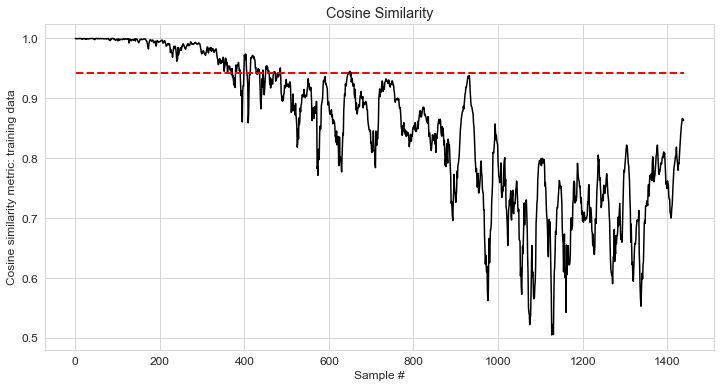

In [41]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

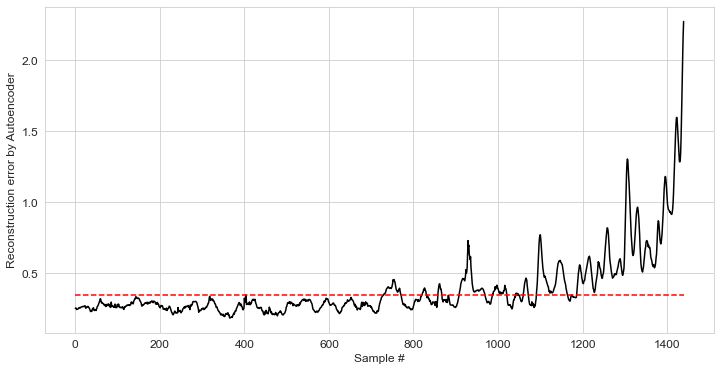

In [42]:
error_ae = autoencoder(df_sensorDrift,AE_CL)

**Inference**<br>
During steady state operation the errors are within limit but, the error is continuously increasing after.<br>
So, let’s check which parameters are deviating maximum form steady state.<br>
Considering top 10 variables responsible for plant deviation.

## **Visualization**

**Q test Error**

In [43]:
#%% Q contribution
error = np.abs(error_pca).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>Q_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 434 mins


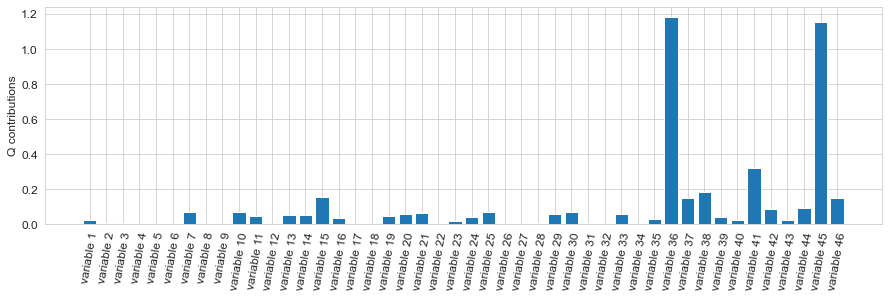

In [44]:
plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

Time- 434 mins


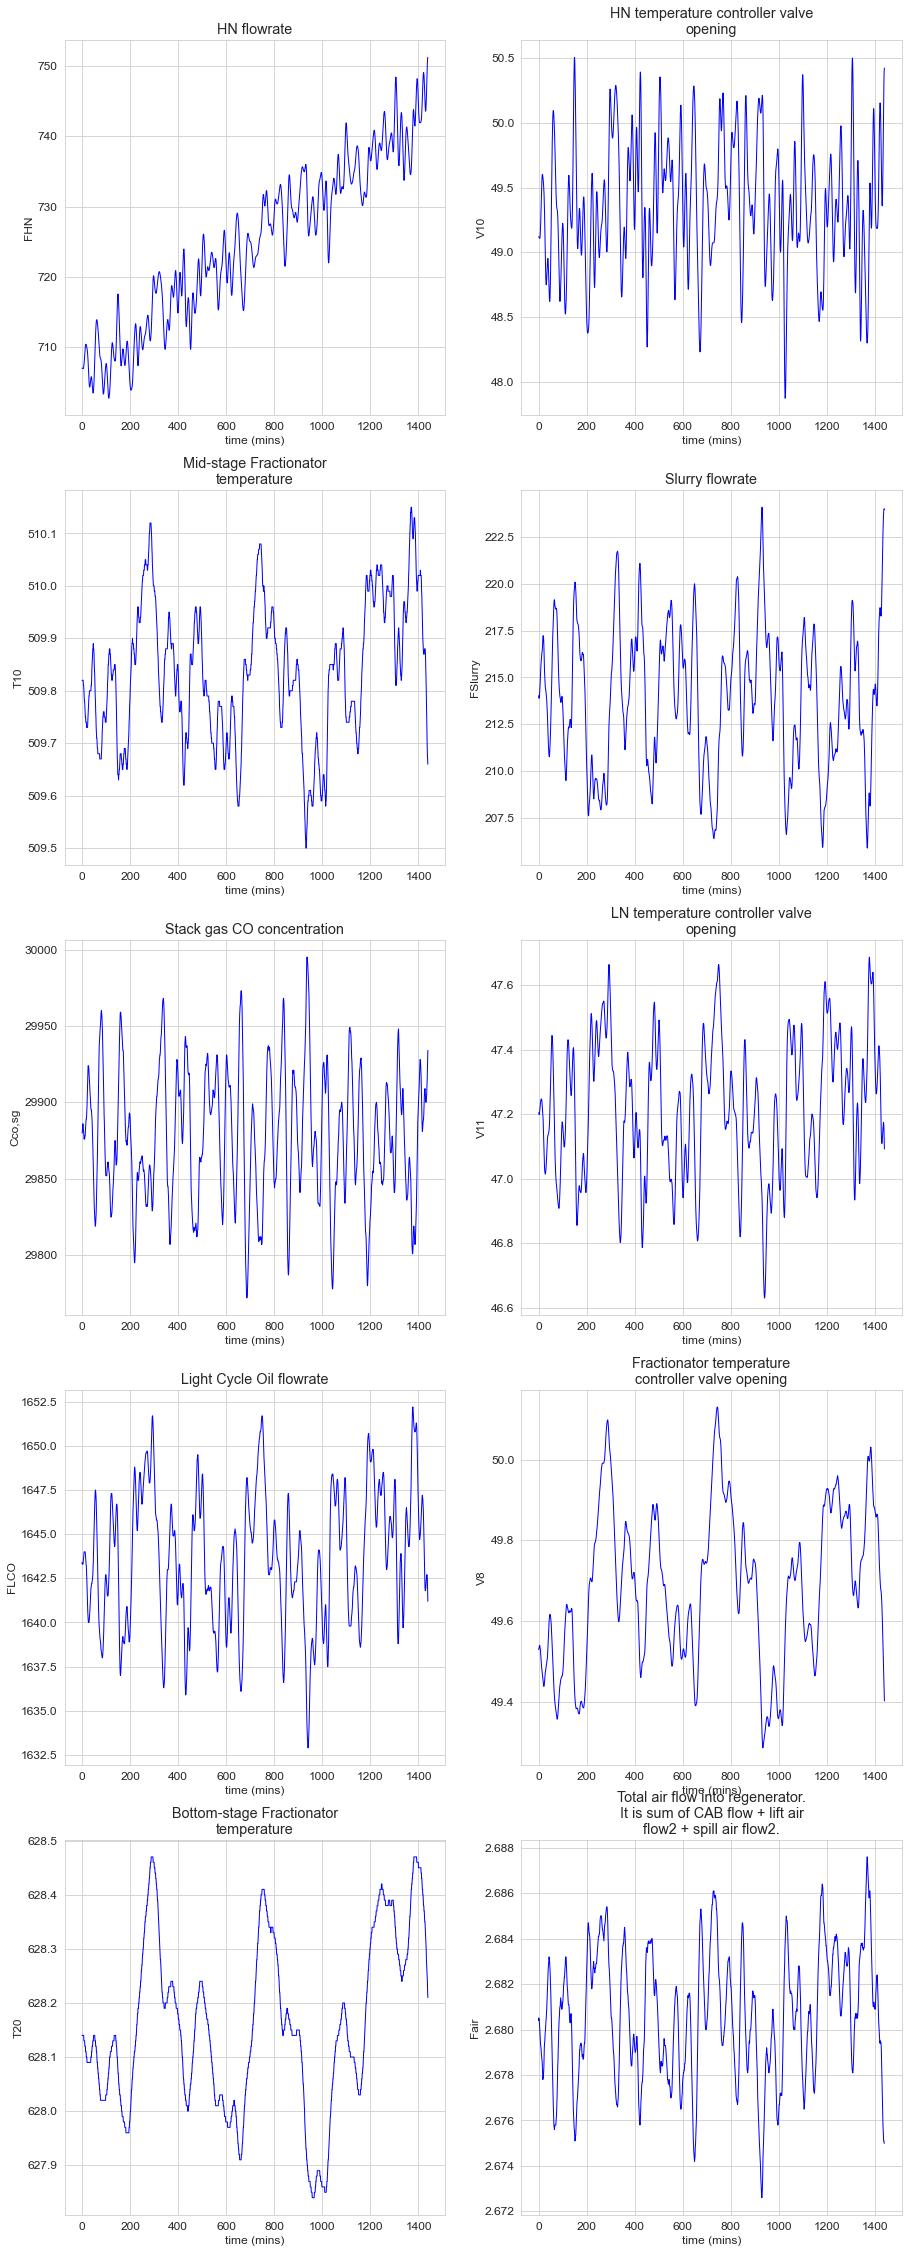

In [45]:
plt.figure(figsize=(15,40))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_sensorDrift.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

**Autoecoder Error**

In [46]:
#%% Autoencoder Error
error = np.abs(error_ae).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>AE_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_ae.sum(axis=1))-pd.Series(error_ae.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 743 mins


Time- 743 mins


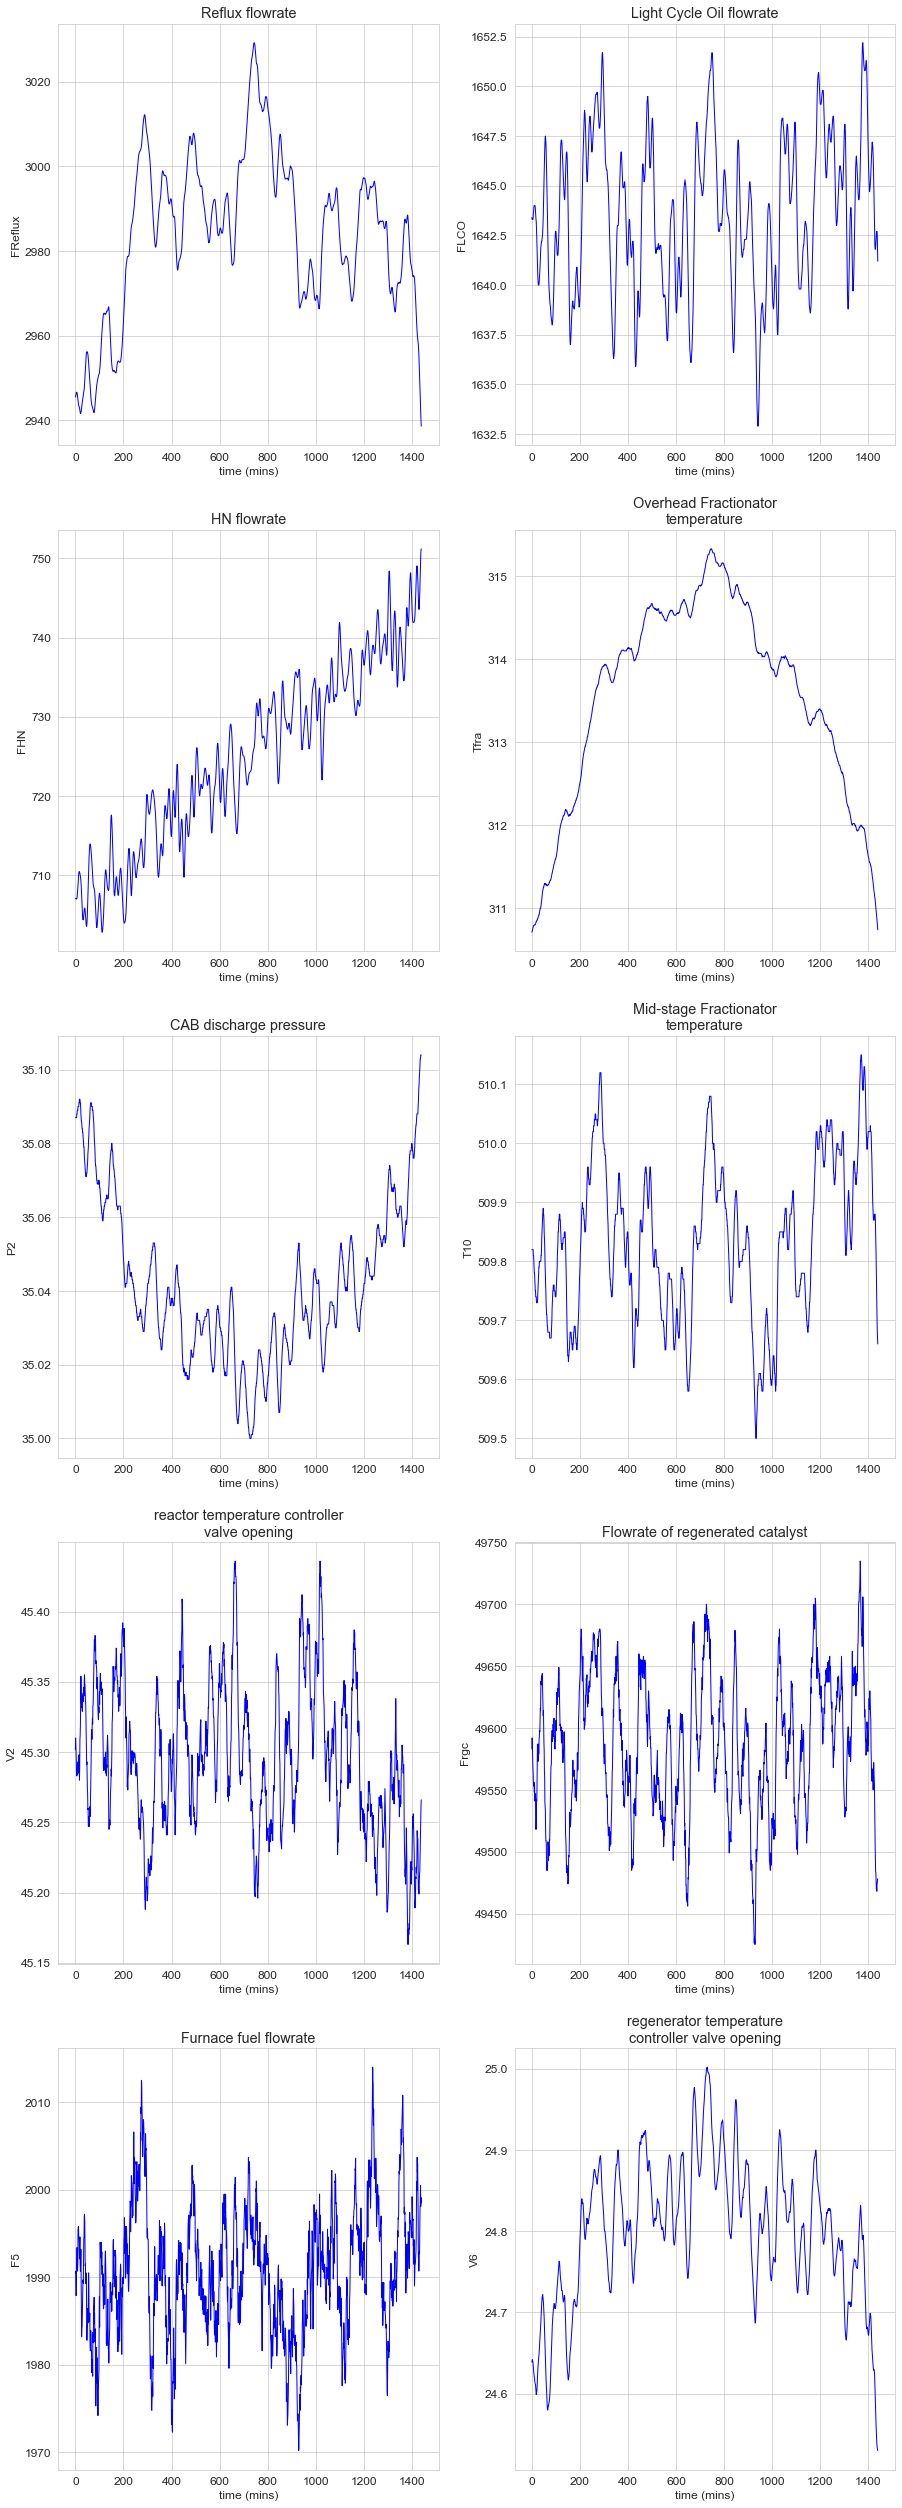

In [47]:
plt.figure(figsize=(15,45))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(error_ae[sample])[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_sensorDrift.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

# **Conclusion**
It is clearly visible from the plot that HN flow rate is continuously increasing rest all parameters are seen to be stable.

# **Future Work**

1. Integrate with IoT sensors for real-time anomaly tracking.
2. Develop a predictive maintenance dashboard using Power BI.